In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt, rcParams

%matplotlib inline

## Problem 1

Difference in iterations is  0.0
Final time =  0.2


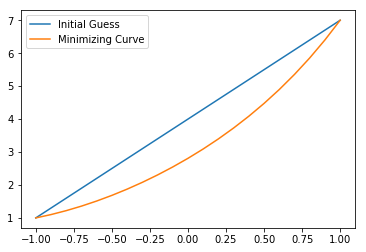

In [2]:
a, b = -1, 1.
alpha, beta = 1., 7.

x_steps = 20
time_steps = 250
final_T = .2

delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)


# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print "stability condition fails"

u = np.empty((2,x_steps+1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

print "Difference in iterations is ", np.linalg.norm(np.abs((u[0] - u[1])))
print "Final time = ", iteration*delta_t

N = len(u[0])
    
domain = np.linspace(-1,1,len(u[0]))
guess = np.linspace(1,7,len(u[0]))
    
plt.plot(domain, guess, label='Initial Guess')
plt.plot(domain, u[0], label='Minimizing Curve')
plt.legend(loc='best')
plt.show()

In [3]:
def noiseify(imagename):
    from numpy.random import randint, uniform, randn
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from scipy.misc import imread, imsave
    
    changed_pixels=40000
    # Read the image file imagename into an array of numbers, IM
    # Multiply by 1. / 255 to change the values so that they are floating point
    # numbers ranging from 0 to 1.
    IM = imread(imagename, flatten=True) * (1. / 255)
    IM_x, IM_y = IM.shape
    
    for lost in xrange(changed_pixels):
        x_,y_ = randint(1,IM_x-2), randint(1,IM_y-2)
        val = .1*randn() + .5
        IM[x_,y_] = max( min(val,1.), 0.)
    imsave(name=("noised_"+imagename),arr=IM)

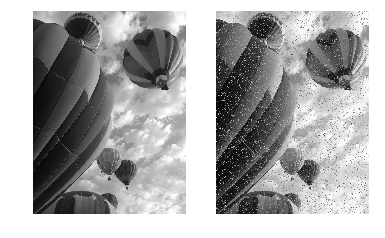

In [4]:
noiseify("balloons_resized_bw.jpg")

plt.subplot(121)
plt.imshow(plt.imread("balloons_resized_bw.jpg"), cmap=plt.cm.Greys_r)
plt.axis('off')

plt.subplot(122)
plt.imshow(plt.imread("noised_balloons_resized_bw.jpg"), cmap=plt.cm.Greys_r)
plt.axis('off')
plt.show()

## Problem 2

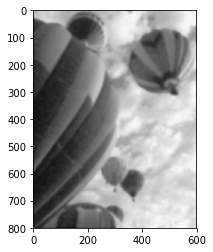

In [5]:
img_filename = 'noised_balloons_resized_bw.jpg'
img = plt.imread(img_filename).astype(float)
img /= 255

n, m = img.shape

del_t = 10**-3
lam = 40
del_x = 1
del_y = 1

u = np.zeros((2,n,m))

u[1,:,:] = img



def diffusion_helper(u):
    u_xx = np.roll(u, -1, axis=0) - 2*u + np.roll(u,1,axis=0)
    u_yy = np.roll(u, -1, axis=1) - 2*u + np.roll(u,1,axis=1)
    
    del_u = u_xx+u_yy
    u[1:-1,1:-1] -= del_t*((u[1:-1,1:-1]-img[1:-1,1:-1])-lam*(del_u[1:-1,1:-1]))
    
for i in xrange(250):
    diffusion_helper(u[1])
    if np.linalg.norm(np.abs(u[0] - u[1])) < 1e-5:
        break
    u[0] = u[1]

diffused = u[1]
plt.imshow(u[1], cmap=plt.cm.Greys_r)
plt.show()

In [6]:
img_filename = 'noised_balloons_resized_bw.jpg'
img = plt.imread(img_filename).astype(float)
img /= 255

n, m = img.shape

del_t = 10**-3
lam = 1
del_x = 1
del_y = 1
eps = 10**-6

u = np.zeros((2,n,m))

u[1,:,:] = img

def total_variation_helper(u):
    u_x = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0)) / 2
    u_y = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1)) / 2

    u_xy = (np.roll(u_x,-1,axis=1) - np.roll(u_x,1,axis=1)) / 2
    u_yx = (np.roll(u_y,-1,axis=0) - np.roll(u_y,1,axis=0)) / 2 


    u_xx = np.roll(u, -1, axis=0) - 2*u + np.roll(u,1,axis=0)
    u_yy = np.roll(u, -1, axis=1) - 2*u + np.roll(u,1,axis=1)
    
    num = u_xx*u_y**2 + u_yy*u_x**2 + u_x*u_y*(u_xy + u_yx)
    denom = (eps + u_x**2 + u_y**2)**(1.5)
    
    du_craziness = num/denom
    
    u[1:-1,1:-1] -= del_t*(lam*(u[1:-1,1:-1]-img[1:-1,1:-1]) - du_craziness[1:-1, 1:-1])
                                  
for i in xrange(10):
    total_variation_helper(u[1])
    if np.linalg.norm(np.abs(u[0] - u[1])) < 1e-5:
        break
    u[0] = u[1]

totvar = u[1]

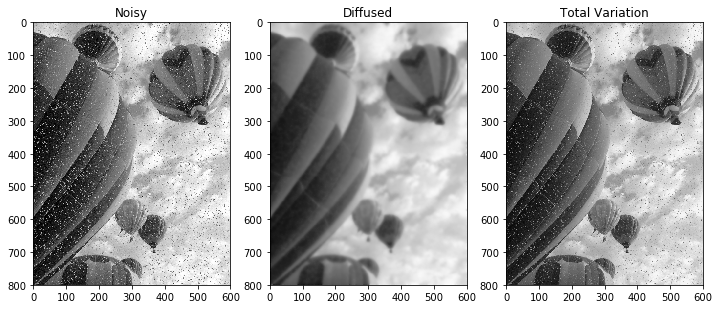

In [10]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12,7)

plt.subplot(131)
plt.imshow(img, cmap=plt.cm.Greys_r)
plt.title("Noisy")

plt.subplot(132)
plt.imshow(diffused, cmap=plt.cm.Greys_r)
plt.title("Diffused")

plt.subplot(133)
plt.imshow(totvar, cmap=plt.cm.Greys_r)
plt.title("Total Variation")

plt.show()